In [141]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np

In [142]:
# 1. 데이터 준비

df = pd.read_csv('./data/student_data.csv', encoding='euc-kr')
# 학교명, 학년, 성별, 키, 몸무게
df = df[['학교명', '학년', '성별', '키', '몸무게']]
len(df)

9686

In [143]:
df.dropna(inplace=True)
len(df)
df

,학교명,학년,성별,키,몸무게
0,서울대도초등학교,1,남,125.8,27.3
1,서울대도초등학교,1,남,124.3,25.4
2,서울대도초등학교,1,남,119.2,23.5
3,서울대도초등학교,1,남,115.0,20.0
4,서울대도초등학교,1,남,120.0,33.5
...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4
9682,세종과학고등학교,3,남,174.1,88.8
9683,세종과학고등학교,3,남,169.5,63.2
9684,세종과학고등학교,3,여,159.2,52.9


In [144]:
df['grade'] = list(map(lambda x: 0 if x[-4:] == '초등학교' else 6 if x[-3:] == '중학교' else 9, df['학교명'])) + df['학년']
# df['grade'] = [0 + j if '초등학교' in i else 6 + j if '중학교' in i else 9 + j for i, j in zip(df['학교명'], df['학년'])]
df

,학교명,학년,성별,키,몸무게,grade
0,서울대도초등학교,1,남,125.8,27.3,1
1,서울대도초등학교,1,남,124.3,25.4,1
2,서울대도초등학교,1,남,119.2,23.5,1
3,서울대도초등학교,1,남,115.0,20.0,1
4,서울대도초등학교,1,남,120.0,33.5,1
...,...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4,12
9682,세종과학고등학교,3,남,174.1,88.8,12
9683,세종과학고등학교,3,남,169.5,63.2,12
9684,세종과학고등학교,3,여,159.2,52.9,12


In [145]:
df.drop(['학교명', '학년'], axis=1, inplace=True)

In [146]:
df.columns = ['gender', 'height', 'weight', 'grade']
df

,gender,height,weight,grade
0,남,125.8,27.3,1
1,남,124.3,25.4,1
2,남,119.2,23.5,1
3,남,115.0,20.0,1
4,남,120.0,33.5,1
...,...,...,...,...
9681,남,176.1,50.4,12
9682,남,174.1,88.8,12
9683,남,169.5,63.2,12
9684,여,159.2,52.9,12


In [147]:
df['gender'] = df['gender'].map({'남' : 0, '여' : 1})

In [148]:
X = df[['weight', 'gender']]
y = df['height']

In [149]:
poly = PolynomialFeatures()
X = poly.fit(X).transform(X)

In [150]:
# 2. 분할
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state=1)

In [151]:
# 3. 준비 (모델)
linear = MLPRegressor(hidden_layer_sizes=(1000, 2), activation='relu', solver='adam')

In [152]:
# 4. 학습
linear.fit(train_X, train_y)

MLPRegressor(hidden_layer_sizes=(10000, 2), solver='sgd')

In [153]:
# 5. 예측 / 평가

predict = linear.predict(test_X)
test_X, predict

(array([[1.00000e+00, 4.26000e+01, 1.00000e+00, 1.81476e+03, 4.26000e+01,
         1.00000e+00],
        [1.00000e+00, 8.18000e+01, 0.00000e+00, 6.69124e+03, 0.00000e+00,
         0.00000e+00],
        [1.00000e+00, 5.70000e+01, 0.00000e+00, 3.24900e+03, 0.00000e+00,
         0.00000e+00],
        ...,
        [1.00000e+00, 2.80000e+01, 1.00000e+00, 7.84000e+02, 2.80000e+01,
         1.00000e+00],
        [1.00000e+00, 7.75000e+01, 0.00000e+00, 6.00625e+03, 0.00000e+00,
         0.00000e+00],
        [1.00000e+00, 6.41000e+01, 0.00000e+00, 4.10881e+03, 0.00000e+00,
         0.00000e+00]]),
 array([-249928.08780962, -249928.08780962, -249928.08780962, ...,
        -249928.08780962, -249928.08780962, -249928.08780962]))

In [154]:
acc = linear.score(test_X, test_y)
acc

-221551025.2009378

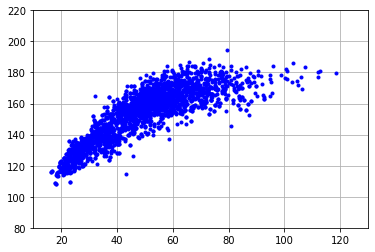

In [155]:
import matplotlib.pyplot as plt

plt.plot(test_X, test_y, 'b.')
plt.plot(test_X, predict, 'r.')
plt.xlim(10, 130)
plt.ylim(80, 220)
plt.grid()